# 1.- Carga de datos

In [1]:
import pandas as pd

df = pd.read_csv('C:/Users/abelc/PycharmProjects/Ciencia De Datos/BD/train.csv')
print(df)

      Row ID        Order ID  Order Date   Ship Date       Ship Mode  \
0          1  CA-2017-152156  08/11/2017  11/11/2017    Second Class   
1          2  CA-2017-152156  08/11/2017  11/11/2017    Second Class   
2          3  CA-2017-138688  12/06/2017  16/06/2017    Second Class   
3          4  US-2016-108966  11/10/2016  18/10/2016  Standard Class   
4          5  US-2016-108966  11/10/2016  18/10/2016  Standard Class   
...      ...             ...         ...         ...             ...   
9795    9796  CA-2017-125920  21/05/2017  28/05/2017  Standard Class   
9796    9797  CA-2016-128608  12/01/2016  17/01/2016  Standard Class   
9797    9798  CA-2016-128608  12/01/2016  17/01/2016  Standard Class   
9798    9799  CA-2016-128608  12/01/2016  17/01/2016  Standard Class   
9799    9800  CA-2016-128608  12/01/2016  17/01/2016  Standard Class   

     Customer ID     Customer Name    Segment        Country             City  \
0       CG-12520       Claire Gute   Consumer  United 

# 2.- Deteccion de outliers

In [2]:
# Paso 2: Verificación de valores faltantes
missing_values = df.isnull().sum()  # Cuenta los valores nulos por columna
total_rows = len(df)  # Número total de filas

# Mostrar el número de valores faltantes por columna
print("Valores faltantes por columna:")
print(missing_values[missing_values > 0])

Valores faltantes por columna:
Postal Code    11
dtype: int64


# 2.1.- Verificar si son mayores al 1%

In [3]:
# Decisión sobre los valores faltantes
threshold = 0.01 * total_rows  # 1% del total de filas

for col in missing_values[missing_values > 0].index:
    missing_count = missing_values[col]

    if missing_count <= threshold:
        # Si son menos del 1%, eliminamos las filas con valores faltantes
        df = df.dropna(subset=[col])
        print(f"Se eliminaron {missing_count} filas en la columna '{col}' (menos del 1%)")
    else:
        # Si son muchos, sugerimos estrategias de imputación
        print(f"La columna '{col}' tiene {missing_count} valores faltantes ({(missing_count/total_rows)*100:.2f}%).")
        print("Sugerencias de imputación:")

        if df[col].dtype == 'object':  # Si es categórica
            print(f" - Imputar con la moda: '{df[col].mode()[0]}'")
        else:  # Si es numérica
            print(f" - Imputar con la media: {df[col].mean():.2f} o la mediana: {df[col].median():.2f}")

# Mostrar la cantidad de filas después del procesamiento
print(f"\nTotal de filas después del manejo de valores faltantes: {len(df)}")

Se eliminaron 11 filas en la columna 'Postal Code' (menos del 1%)

Total de filas después del manejo de valores faltantes: 9789


# 3.- Estadisticos de la variable "sale"

# 3.1.- Medidas de centralidad

In [4]:
sales_mean = df['Sales'].mean()
sales_median = df['Sales'].median()
sales_mode = df['Sales'].mode()[0]
print(f"Media: {sales_mean}")
print(f"Mediana: {sales_median}")
print(f"Moda: {sales_mode}")

Media: 230.1161929410563
Mediana: 54.384
Moda: 12.96


# 3.2.- Medidas de posición

In [5]:
sales_min = df['Sales'].min()
sales_max = df['Sales'].max()
sales_range = sales_max - sales_min
sales_quartiles = df['Sales'].quantile([0.25, 0.5, 0.75])
sales_iqr = sales_quartiles[0.75] - sales_quartiles[0.25]
print(f"Mínimo: {sales_min}, Máximo: {sales_max}, Rango: {sales_range}")
print(f"Cuartiles: {sales_quartiles}")
print(f"Rango intercuartílico: {sales_iqr}")

Mínimo: 0.444, Máximo: 22638.48, Rango: 22638.036
Cuartiles: 0.25     17.248
0.50     54.384
0.75    210.392
Name: Sales, dtype: float64
Rango intercuartílico: 193.144


# 3.3.- Medidas de dispersión

In [6]:
sales_variance = df['Sales'].var()
sales_std = df['Sales'].std()
sales_cv = sales_std / sales_mean
print(f"Varianza: {sales_variance}, Desviación estándar: {sales_std}, Coeficiente de variación: {sales_cv}")

Varianza: 391002.6900158407, Desviación estándar: 625.3020790112893, Coeficiente de variación: 2.717331931401537


# 3.4.- Medidas de forma

In [7]:
from scipy.stats import stats

sales_skewness = stats.skew(df['Sales'])
sales_kurtosis = stats.kurtosis(df['Sales'])
print(f"Asimetría: {sales_skewness}, Curtosis: {sales_kurtosis}")

Asimetría: 13.051630620138322, Curtosis: 307.14803167918313


C:\Users\abelc\AppData\Local\Temp\ipykernel_27160\2067794462.py:3: DeprecationWarning: Please import `skew` from the `scipy.stats` namespace; the `scipy.stats.stats` namespace is deprecated and will be removed in SciPy 2.0.0.
  sales_skewness = stats.skew(df['Sales'])
C:\Users\abelc\AppData\Local\Temp\ipykernel_27160\2067794462.py:4: DeprecationWarning: Please import `kurtosis` from the `scipy.stats` namespace; the `scipy.stats.stats` namespace is deprecated and will be removed in SciPy 2.0.0.
  sales_kurtosis = stats.kurtosis(df['Sales'])


# 4.- Comparación por grupos

# 4.1- Agrupar por Category y calcular el promedio de Sales

In [8]:
df_category = df.groupby('Category')['Sales'].mean().sort_values(ascending=False)
print(df_category)

Category
Technology         456.274096
Furniture          348.525277
Office Supplies    119.128041
Name: Sales, dtype: float64


# 4.2- Agrupar por Segment y calcular el promedio de Sales

In [9]:
df_segment = df.groupby('Segment')['Sales'].mean().sort_values(ascending=False)
print(df_segment)

Segment
Home Office    242.800818
Corporate      231.415141
Consumer       225.021223
Name: Sales, dtype: float64


# 4.3- Agrupar por Region y calcular el promedio de Sales

In [10]:
df_region = df.groupby('Region')['Sales'].mean().sort_values(ascending=False)
print(df_region)

Region
South      243.524067
East       238.136033
West       226.184613
Central    216.357889
Name: Sales, dtype: float64


# 5 Visualización de la distribución de ventas

# 5.1- Histograma con curva de densidad (KDE)

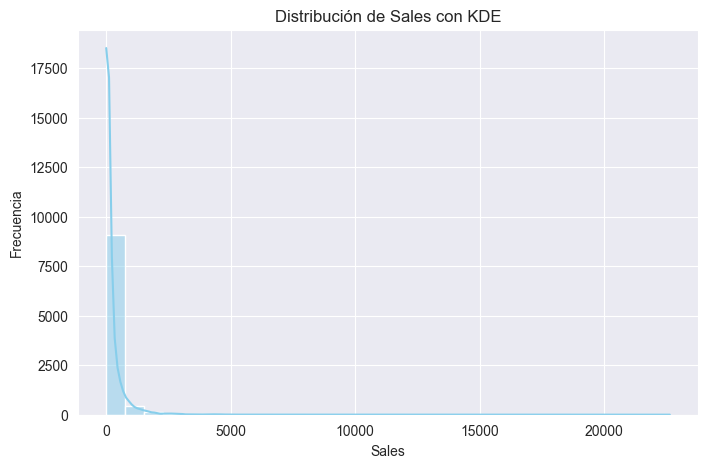

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.histplot(df['Sales'], bins=30, kde=True, color='skyblue')
plt.xlabel('Sales')
plt.ylabel('Frecuencia')
plt.title('Distribución de Sales con KDE')
plt.show()

# 5.2- Boxplot de la variable Sales

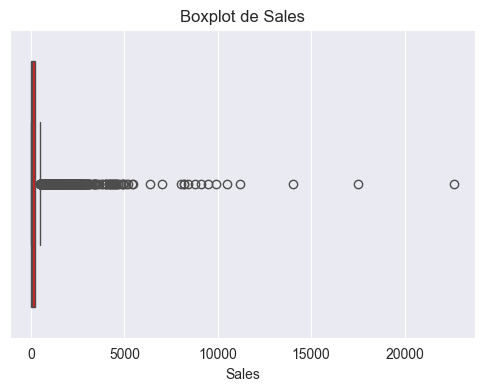

In [12]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df['Sales'], color='red')
plt.xlabel('Sales')
plt.title('Boxplot de Sales')
plt.show()

# 6- Detección y tratamiento de outliers

# 6.1- Calcular los límites de outliers usando la regla IQR

In [13]:
Q1 = df['Sales'].quantile(0.25)
Q3 = df['Sales'].quantile(0.75)
IQR = Q3 - Q1

limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

print(f"Límite inferior: {limite_inferior}")
print(f"Límite superior: {limite_superior}")


Límite inferior: -272.468
Límite superior: 500.108


# 6.2- Contar cuántos valores están fuera de los límites

In [14]:
outliers = df[(df['Sales'] < limite_inferior) | (df['Sales'] > limite_superior)]
print(f"Número de outliers detectados: {len(outliers)}")

Número de outliers detectados: 1141


# 6.3- Eliminar los outliers

In [15]:
# Eliminar los outliers
df_sin_outliers = df[(df['Sales'] >= limite_inferior) & (df['Sales'] <= limite_superior)]

print(f"Total de filas después de eliminar outliers: {len(df_sin_outliers)}")

Total de filas después de eliminar outliers: 8648


# 7- Boxplots por categorías

C:\Users\abelc\AppData\Local\Temp\ipykernel_27160\765056400.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category', y='Sales', data=df, palette='Set2')


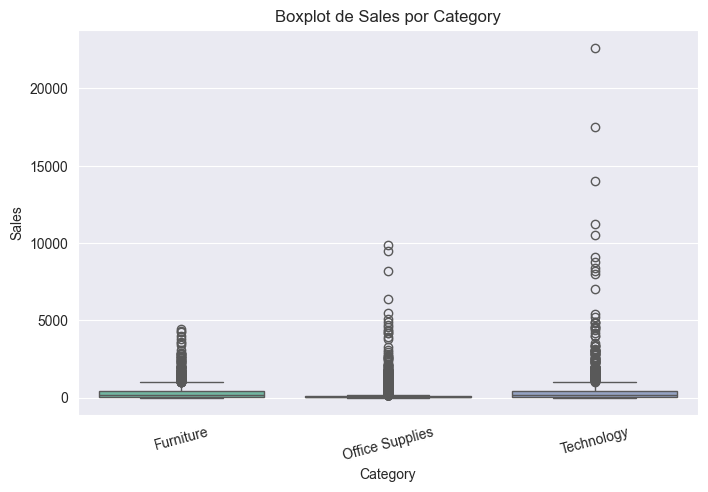

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.boxplot(x='Category', y='Sales', data=df, palette='Set2')
plt.xlabel('Category')
plt.ylabel('Sales')
plt.title('Boxplot de Sales por Category')
plt.xticks(rotation=15)  # Rotar etiquetas si son largas
plt.show()


# 8- Pruebas de normalidad

# 8.1- Shapiro-Wilk

In [17]:
import pandas as pd
import numpy as np
import scipy.stats as stats
stat, p_value = stats.shapiro(df['Sales'].dropna())  # Eliminar valores nulos si existen
print(f"Shapiro-Wilk Test: Estadístico={stat:.4f}, p-valor={p_value:.4f}")

if p_value > 0.05:
    print("No se rechaza la hipótesis nula: La distribución parece normal.")
else:
    print("Se rechaza la hipótesis nula: La distribución no es normal.")


Shapiro-Wilk Test: Estadístico=0.3219, p-valor=0.0000
Se rechaza la hipótesis nula: La distribución no es normal.


C:\Users\abelc\PycharmProjects\Ciencia De Datos\.venv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 9789.
  res = hypotest_fun_out(*samples, **kwds)


# 8.2- Kolmogorov-Smirnov

In [18]:
import pandas as pd
import numpy as np
import scipy.stats as stats

stat, p_value = stats.kstest(df['Sales'], 'norm', args=(df['Sales'].mean(), df['Sales'].std()))
print(f"Kolmogorov-Smirnov Test: Estadístico={stat:.4f}, p-valor={p_value:.4f}")

if p_value > 0.05:
    print("No se rechaza la hipótesis nula: La distribución parece normal.")
else:
    print("Se rechaza la hipótesis nula: La distribución no es normal.")


Kolmogorov-Smirnov Test: Estadístico=0.3567, p-valor=0.0000
Se rechaza la hipótesis nula: La distribución no es normal.


# 8.3- Anderson-Darling

In [19]:
import pandas as pd
import numpy as np
import scipy.stats as stats

result = stats.anderson(df['Sales'].dropna(), dist='norm')
print(f"Anderson-Darling Test: Estadístico={result.statistic:.4f}")

for i in range(len(result.critical_values)):
    significance_level = result.significance_level[i]
    critical_value = result.critical_values[i]
    print(f"Nivel de significancia: {significance_level}% - Valor crítico: {critical_value:.4f}")

if result.statistic < result.critical_values[2]:  # Usando el umbral del 5%
    print("No se rechaza la hipótesis nula: La distribución parece normal.")
else:
    print("Se rechaza la hipótesis nula: La distribución no es normal.")


Anderson-Darling Test: Estadístico=1804.9416
Nivel de significancia: 15.0% - Valor crítico: 0.5760
Nivel de significancia: 10.0% - Valor crítico: 0.6560
Nivel de significancia: 5.0% - Valor crítico: 0.7870
Nivel de significancia: 2.5% - Valor crítico: 0.9180
Nivel de significancia: 1.0% - Valor crítico: 1.0920
Se rechaza la hipótesis nula: La distribución no es normal.


# 9- Intervalo de confianza para la media de Sales

In [20]:
# Definir la confianza y los datos
sales = df['Sales'].dropna()  # Eliminar valores nulos si existen
n = len(sales)  # Tamaño de la muestra
media = np.mean(sales)  # Media muestral
std_error = stats.sem(sales)  # Error estándar de la media

# Intervalo de confianza del 95%
ic_95 = stats.t.interval(0.95, df=n-1, loc=media, scale=std_error)
print(f"Intervalo de confianza del 95%: {ic_95}")

# Intervalo de confianza del 99%
ic_99 = stats.t.interval(0.99, df=n-1, loc=media, scale=std_error)
print(f"Intervalo de confianza del 99%: {ic_99}")

Intervalo de confianza del 95%: (np.float64(217.72758507307788), np.float64(242.50480080903475))
Intervalo de confianza del 99%: (np.float64(213.83364050223165), np.float64(246.39874537988098))


# 10- Prueba de hipótesis: Comparación entre segmentos

# 10.1- Filtrar los datos de los segmentos Consumer y Corporate

In [21]:
import scipy.stats as stats

consumer_sales = df[df['Segment'] == 'Consumer']['Sales']
corporate_sales = df[df['Segment'] == 'Corporate']['Sales']
print(consumer_sales)

0       261.9600
1       731.9400
3       957.5775
4        22.3680
5        48.8600
          ...   
9790    211.2460
9791     56.0640
9792    107.7720
9793      4.8320
9794     18.2400
Name: Sales, Length: 5096, dtype: float64


# 10.2- Verificar normalidad en ambos grupos (Shapiro-Wilk)

In [22]:
# Realizar la prueba de Mann-Whitney U
stat, p_value = stats.mannwhitneyu(consumer_sales, corporate_sales, alternative='two-sided')

print(f"Estadístico de la prueba: {stat:.4f}")
print(f"p-valor: {p_value:.4f}")

# Interpretar el p-valor con un nivel de significancia de α = 0.05
alpha = 0.05
if p_value < alpha:
    print("Rechazamos H0: Hay una diferencia significativa en las ventas entre los segmentos.")
else:
    print("No rechazamos H0: No hay una diferencia significativa en las ventas entre los segmentos.")

Estadístico de la prueba: 7458762.5000
p-valor: 0.5992
No rechazamos H0: No hay una diferencia significativa en las ventas entre los segmentos.


# 11- Prueba de independencia

# 11.1- Construir la tabla de contingencia entre las variables Region y Category

In [23]:
# Construir la tabla de contingencia
contingency_table = pd.crosstab(df['Region'], df['Category'])
print("Tabla de contingencia entre Region y Category:")
print(contingency_table)


Tabla de contingencia entre Region y Category:
Category  Furniture  Office Supplies  Technology
Region                                          
Central         470             1399         408
East            589             1661         524
South           326              983         289
West            691             1860         589


# 11.2- Aplicar la prueba Chi-cuadrada

In [24]:
# Realizar la prueba Chi-cuadrada
chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table)

print(f"Estadístico Chi-cuadrado: {chi2_stat:.4f}")
print(f"p-valor: {p_value:.4f}")
print(f"Grados de libertad: {dof}")
print("Frecuencia esperada:")
print(expected)


Estadístico Chi-cuadrado: 4.2405
p-valor: 0.6442
Grados de libertad: 6
Frecuencia esperada:
[[ 482.89426908 1373.08519767  421.02053325]
 [ 588.29543365 1672.78802738  512.91653897]
 [ 338.89549494  963.63203596  295.4724691 ]
 [ 665.91480233 1893.49473899  580.59045868]]


# 11.3- Interpretar el p-valor

In [25]:
alpha = 0.05  # Nivel de significancia
if p_value < alpha:
    print("Rechazamos H0: Las variables Region y Category están asociadas (dependientes).")
else:
    print("No rechazamos H0: Las variables Region y Category son independientes.")


No rechazamos H0: Las variables Region y Category son independientes.
